In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!pip install keras-applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
#from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
#from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python.keras.optimizers import RMSprop
#from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3

sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [ ]:
%cd /content/drive/My Drive/kaggle
!pwd

/content/drive/My Drive/kaggle
/content/drive/My Drive/kaggle


In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os


In [ ]:
data_dir = '/content/drive/MyDrive/kaggle/test_fugan_classification'
batch_size = 8
img_height = 224
img_width = 224

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 129 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10
16/16 [==============================] - 82s 4s/step - loss: 5.1402 - accuracy: 0.8595 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
16/16 [==============================] - 3s 202ms/step - loss: 0.2205 - accuracy: 0.9835 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
16/16 [==============================] - 3s 181ms/step - loss: 1.1071 - accuracy: 0.9752 - val_loss: 0.9002 - val_accuracy: 0.9167
Epoch 4/10
16/16 [==============================] - 3s 158ms/step - loss: 1.7638 - accuracy: 0.9752 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 4s 240ms/step - loss: 2.8115 - accuracy: 0.9669 - val_loss: 7.2274 - val_accuracy: 0.9583
Epoch 6/10
16/16 [==============================] - 2s 149ms/step - loss: 6.2746 - accuracy: 0.9669 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 2s 157ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_a

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


4/4 [==============================] - 1s 363ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Accuracy: 100.00%


In [ ]:
model.save('model_test.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


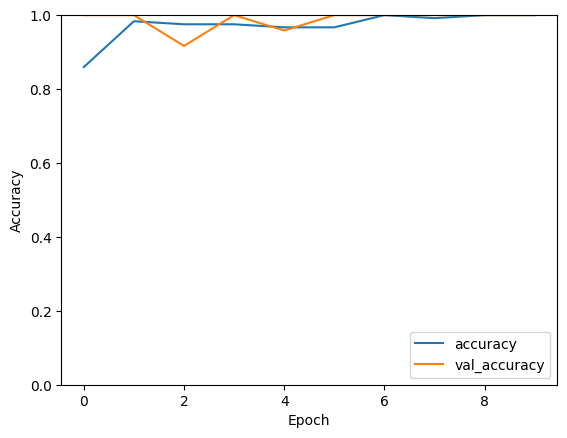

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 1s 952ms/step
Predicted class: Y U Li
Class probabilities: [[0. 0. 1.]]


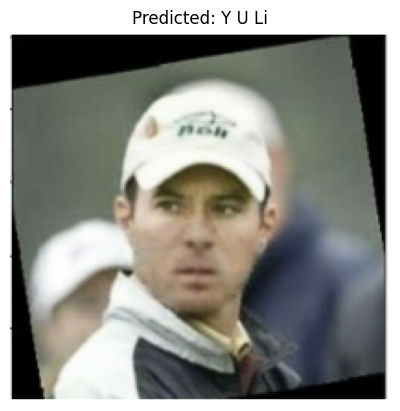

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('model_test.h5')

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

def predict_image(model, img_path, class_indices):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class[0]], predictions

def display_image_with_prediction(img_path, predicted_class):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

# Example usage
img_path = 'test_generated.jpg'
class_indices = train_generator.class_indices  # Assumes you still have the train_generator from training

predicted_class, probabilities = predict_image(model, img_path, class_indices)
print(f'Predicted class: {predicted_class}')
print(f'Class probabilities: {probabilities}')

display_image_with_prediction(img_path, predicted_class)
